In [1]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\ABISA\Desktop\drug side effect.csv")

In [3]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,Olivia Brewer,Hispanic
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,Rebecca David,Native American
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0,Michael Carlson,African American
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0,Robert Jackson,Native American
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1,Jennifer Brown,Asian


In [4]:
df.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Name,Race
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,Lauren Garcia,Caucasian
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16,Angela Sanders,Native American
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,William Duncan,Hispanic
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,Chelsea Hughes DDS,Hispanic
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3,Jeffrey Collins,Asian


In [5]:
df.shape


(362806, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
 12  Name           362806 non-null  object
 13  Race           362806 non-null  object
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


# Preprocessing

In [7]:
# Identify missing values
df.isna().sum() 

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Name              0
Race              0
dtype: int64

In [8]:
df[['Drug','Condition','Effectiveness']].head(15)

,Drug,Condition,Effectiveness
0,25dph-7.5peh,Stuffy Nose,5
1,25dph-7.5peh,Cold Symptoms,5
2,warfarin (bulk) 100 % powder,Other,3
3,warfarin (bulk) 100 % powder,Other,2
4,warfarin (bulk) 100 % powder,Other,1
5,warfarin (bulk) 100 % powder,Other,4
6,wymzya fe,Birth Control,5
7,wymzya fe,Disease of Ovaries with Cysts,5
8,wymzya fe,Acne,2
9,"12 hour nasal relief spray, non-aerosol",Stuffy Nose,2


In [9]:
df[['Drug','Condition','Effectiveness','Reviews']].head(15)

,Drug,Condition,Effectiveness,Reviews
0,25dph-7.5peh,Stuffy Nose,5,I'm a retired physician and of all the meds I ...
1,25dph-7.5peh,Cold Symptoms,5,cleared me right up even with my throat hurtin...
2,warfarin (bulk) 100 % powder,Other,3,why did my PTINR go from a normal of 2.5 to ov...
3,warfarin (bulk) 100 % powder,Other,2,FALLING AND DON'T REALISE IT
4,warfarin (bulk) 100 % powder,Other,1,My grandfather was prescribed this medication ...
5,warfarin (bulk) 100 % powder,Other,4,help heart condition operation well
6,wymzya fe,Birth Control,5,Haven't gotten pregnant so it does it's job. I...
7,wymzya fe,Disease of Ovaries with Cysts,5,I have take this for 5 years age 45-50 to prev...
8,wymzya fe,Acne,2,
9,"12 hour nasal relief spray, non-aerosol",Stuffy Nose,2,The 12 hour spray only works for me for 6 hours.


In [10]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460
Name,362806,180676,Michael Smith,176
Race,362806,5,African American,72824


In [13]:
df.duplicated().sum()

0

In [14]:
for i in df.columns:
    print(i,':',df[i].nunique(),'\n')

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 

Name : 180676 

Race : 5 



In [15]:
df['Name'].value_counts()

Michael Smith         176
Michael Johnson       132
James Smith           129
Michael Williams      123
Jennifer Smith        110
                     ... 
Natalie Patel           1
Cynthia Barker DVM      1
Jordan Powers           1
Renee Durham            1
Chelsea Hughes DDS      1
Name: Name, Length: 180676, dtype: int64

In [16]:
df['Race'].value_counts()

African American    72824
Native American     72666
Hispanic            72599
Caucasian           72473
Asian               72244
Name: Race, dtype: int64

In [17]:
df['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [18]:
df['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [19]:
df['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [20]:
df['Reviews'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           41824
good                                                                                                                                                                                                                                                                                                                                                   

In [21]:
df['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [22]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [23]:
df['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [24]:
df['Condition'].value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [25]:
df['Drug'].value_counts().head(10)

cymbalta                     4648
lisinopril                   4269
lisinopril solution          4269
lexapro                      4134
hydrocodone-acetaminophen    3944
effexor xr                   3486
lyrica                       3069
tramadol hcl er              2932
tramadol hcl                 2932
zoloft                       2662
Name: Drug, dtype: int64

In [26]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Name', 'Race'],
      dtype='object')

In [27]:
df.isna().sum() 

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
Name              0
Race              0
dtype: int64

In [28]:
# Drop rows with missing values in the 'Review' column
df.dropna(subset=['Reviews'], inplace=True)

# Exploratory Data Analysis

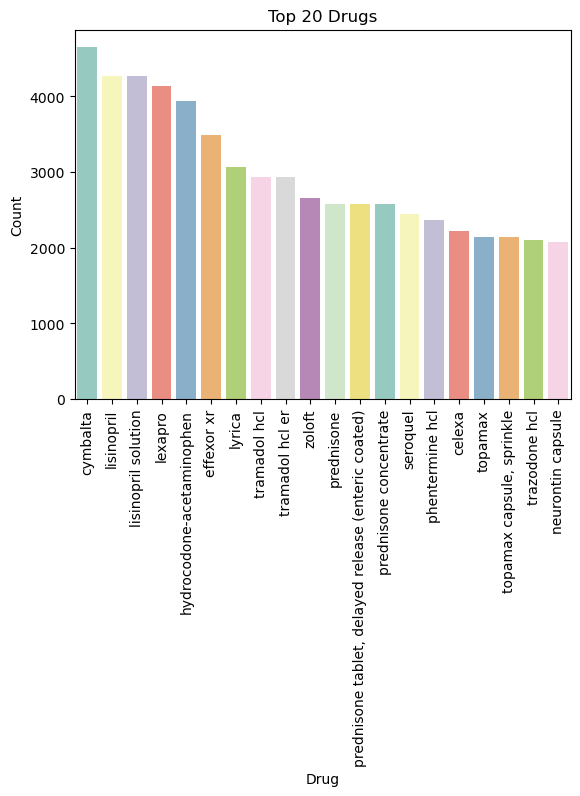

In [30]:
#the list of drugs available (top 20)
top_drugs = df['Drug'].value_counts().head(20)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='Set3')
plt.title("Top 20 Drugs")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=90,fontsize=10)  # Rotates the x-axis labels for better readability
plt.show()

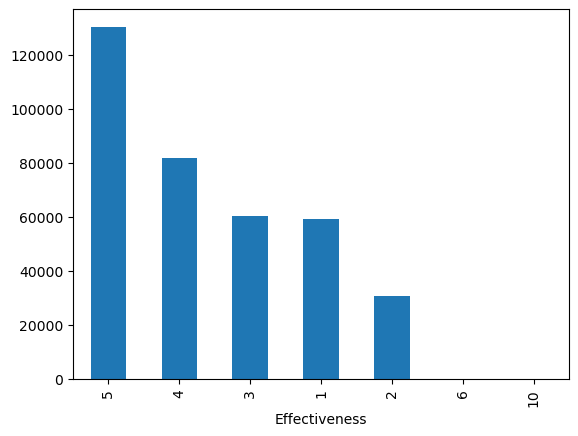

In [31]:
#the effectiveness of the drugs
df['Effectiveness'].value_counts().plot(kind='bar')
plt.xlabel('Effectiveness')
plt.show()

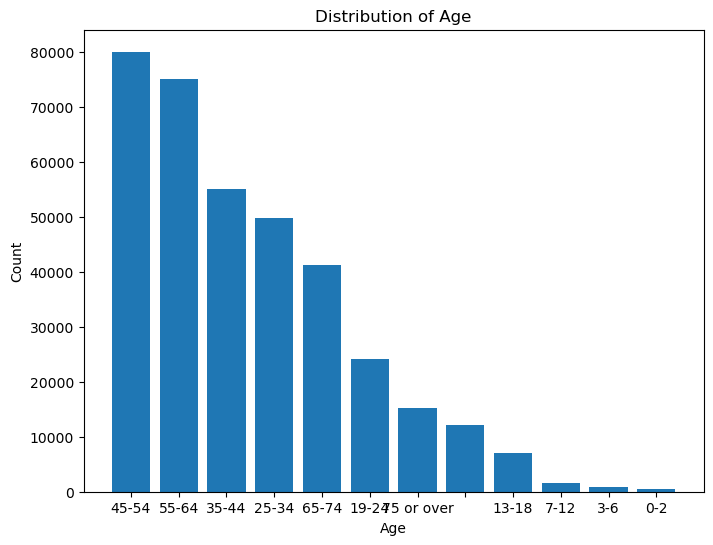

In [32]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

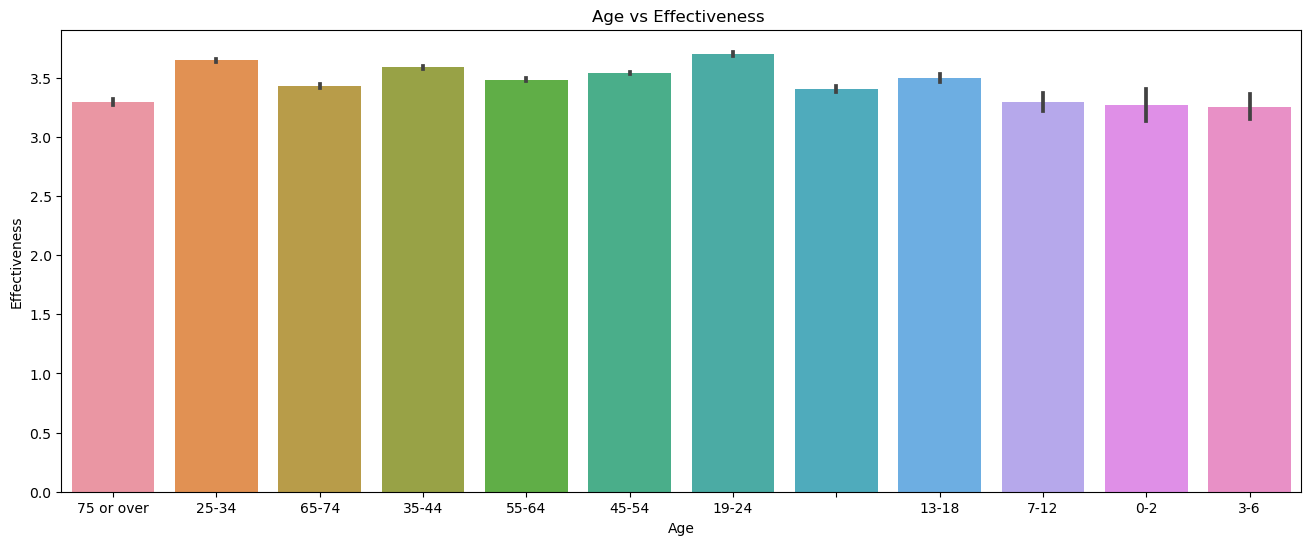

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Age', y='Effectiveness', data=df, ax=ax)
ax.set_title('Age vs Effectiveness ')
ax.set_xlabel('Age')
ax.set_ylabel('Effectiveness')
plt.show()

In [34]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Name', 'Race'],
      dtype='object')

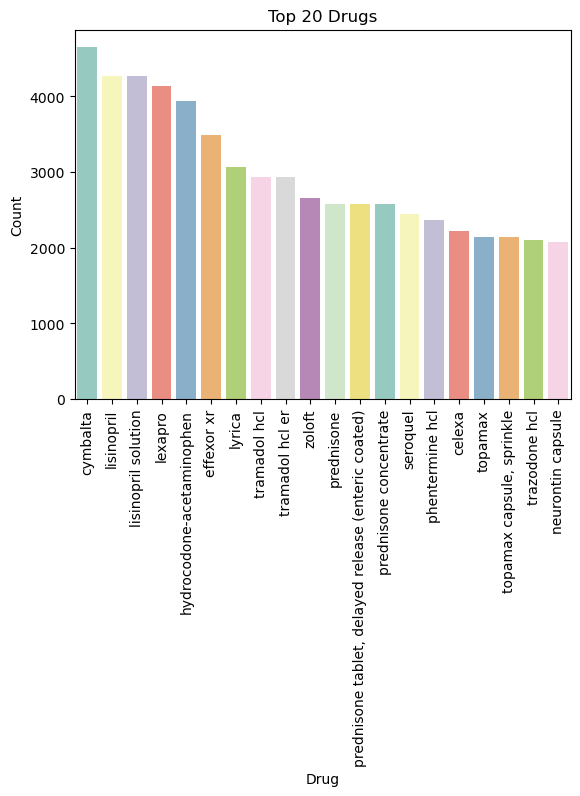

In [35]:
top_drugs = df['Drug'].value_counts().head(20)
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette='Set3')
plt.title("Top 20 Drugs")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=90,fontsize=10)  # Rotates the x-axis labels for better readability
plt.show()

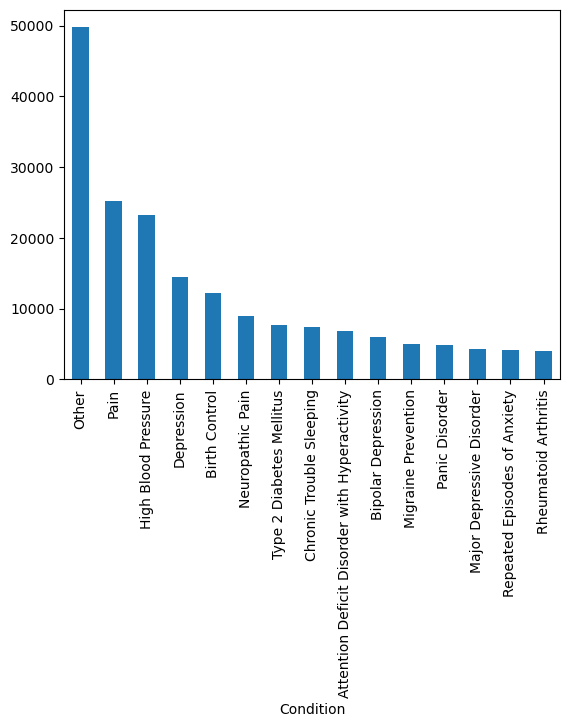

In [36]:
#various condition the medicine cures (top 10)
df['Condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel('Condition')
plt.show()